In [1]:
from pylab import *
import math
import numpy as np
import torch


In [2]:
z=3.14-1.57
taille=100
z=z/taille
x = 1.57*torch.ones(taille)
for i in range(taille):
    x[i]=x[i]+z*i
print(x)

tensor([1.5700, 1.5857, 1.6014, 1.6171, 1.6328, 1.6485, 1.6642, 1.6799, 1.6956,
        1.7113, 1.7270, 1.7427, 1.7584, 1.7741, 1.7898, 1.8055, 1.8212, 1.8369,
        1.8526, 1.8683, 1.8840, 1.8997, 1.9154, 1.9311, 1.9468, 1.9625, 1.9782,
        1.9939, 2.0096, 2.0253, 2.0410, 2.0567, 2.0724, 2.0881, 2.1038, 2.1195,
        2.1352, 2.1509, 2.1666, 2.1823, 2.1980, 2.2137, 2.2294, 2.2451, 2.2608,
        2.2765, 2.2922, 2.3079, 2.3236, 2.3393, 2.3550, 2.3707, 2.3864, 2.4021,
        2.4178, 2.4335, 2.4492, 2.4649, 2.4806, 2.4963, 2.5120, 2.5277, 2.5434,
        2.5591, 2.5748, 2.5905, 2.6062, 2.6219, 2.6376, 2.6533, 2.6690, 2.6847,
        2.7004, 2.7161, 2.7318, 2.7475, 2.7632, 2.7789, 2.7946, 2.8103, 2.8260,
        2.8417, 2.8574, 2.8731, 2.8888, 2.9045, 2.9202, 2.9359, 2.9516, 2.9673,
        2.9830, 2.9987, 3.0144, 3.0301, 3.0458, 3.0615, 3.0772, 3.0929, 3.1086,
        3.1243])


In [11]:
trainset = torch.utils.data.DataLoader(x, batch_size=8, shuffle=True)
testset = torch.utils.data.DataLoader(x, batch_size=8, shuffle=True)


In [12]:
print (x)
y=torch.sin(x)
print (y)

tensor([1.5700, 1.5857, 1.6014, 1.6171, 1.6328, 1.6485, 1.6642, 1.6799, 1.6956,
        1.7113, 1.7270, 1.7427, 1.7584, 1.7741, 1.7898, 1.8055, 1.8212, 1.8369,
        1.8526, 1.8683, 1.8840, 1.8997, 1.9154, 1.9311, 1.9468, 1.9625, 1.9782,
        1.9939, 2.0096, 2.0253, 2.0410, 2.0567, 2.0724, 2.0881, 2.1038, 2.1195,
        2.1352, 2.1509, 2.1666, 2.1823, 2.1980, 2.2137, 2.2294, 2.2451, 2.2608,
        2.2765, 2.2922, 2.3079, 2.3236, 2.3393, 2.3550, 2.3707, 2.3864, 2.4021,
        2.4178, 2.4335, 2.4492, 2.4649, 2.4806, 2.4963, 2.5120, 2.5277, 2.5434,
        2.5591, 2.5748, 2.5905, 2.6062, 2.6219, 2.6376, 2.6533, 2.6690, 2.6847,
        2.7004, 2.7161, 2.7318, 2.7475, 2.7632, 2.7789, 2.7946, 2.8103, 2.8260,
        2.8417, 2.8574, 2.8731, 2.8888, 2.9045, 2.9202, 2.9359, 2.9516, 2.9673,
        2.9830, 2.9987, 3.0144, 3.0301, 3.0458, 3.0615, 3.0772, 3.0929, 3.1086,
        3.1243])
tensor([1.0000, 0.9999, 0.9995, 0.9989, 0.9981, 0.9970, 0.9956, 0.9941, 0.9922,
        0.9901, 0.9878,

In [13]:

import torch.nn as nn
import torch.nn.functional as F #the activation function 
import numpy as np

In [14]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8) #fc = fully connected layer , 28*28 number of input
        self.fc2 = nn.Linear(8, 8)    #in our case there are 28*28 images as inputs    #ze are going to use 64 neuron per layer network 
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 8)    #in our case there are 28*28 images as inputs    #ze are going to use 64 neuron per layer network 
        self.fc5 = nn.Linear(8, 1)#10 is the number of outputs we gonna classify as (in this case 10 : from 0 to 9)
    #where the flow of data is going through
    
    def forward(self, x):
        x = F.sigmoid(self.fc1(x)) #relu stands for rectified linear
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        x = self.fc5(x)
        
        return torch.sigmoid(x) #don't forget the activation function 
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=8, bias=True)
  (fc5): Linear(in_features=8, out_features=1, bias=True)
)


In [15]:
X = torch.rand(1)
X = X.view(-1,1)
print (X)
output = net(X)
print(output)

tensor([[0.3121]])
tensor([[0.5814]], grad_fn=<SigmoidBackward>)


In [16]:
print(torch.sin(X))

tensor([[0.3070]])


In [17]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [18]:
for epoch in range(800): # 3 full passes over the data
    for data in trainset: 
        X = data  # X is the batch of features, y is the batch of targets.
        output = net(X.view(-1,1))
        target = torch.sin(X)
        target = target.view(-1,1).float()
        loss = F.mse_loss(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
print(loss)

tensor(5.2079e-05, grad_fn=<MseLossBackward>)


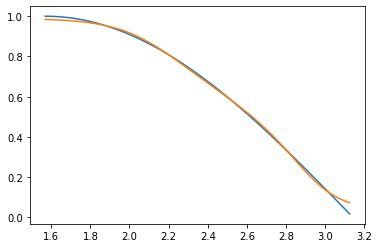

In [19]:
predictions = net(torch.Tensor(np.reshape(x, (-1,1))))
plt.plot(x, y , x ,predictions.detach().numpy())
plt.show()